# Exploring the Bike Sharing DataSet

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

# help in creating the graphs in the notebook otherwise they will pop up

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
train_data = pd.read_csv('train.csv')
train_data.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
train_data.shape

(13035, 16)

# Attribute Information:

- instant: record index
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1: 2012)
- mnth : month (1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13035 entries, 0 to 13034
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     13035 non-null  int64  
 1   season      13035 non-null  int64  
 2   yr          13035 non-null  int64  
 3   mnth        13035 non-null  int64  
 4   hr          13035 non-null  int64  
 5   holiday     13035 non-null  int64  
 6   weekday     13035 non-null  int64  
 7   workingday  13035 non-null  int64  
 8   weathersit  13035 non-null  int64  
 9   temp        13035 non-null  float64
 10  atemp       13035 non-null  float64
 11  hum         13035 non-null  float64
 12  windspeed   13035 non-null  float64
 13  casual      13035 non-null  int64  
 14  registered  13035 non-null  int64  
 15  cnt         13035 non-null  int64  
dtypes: float64(4), int64(12)
memory usage: 1.6 MB


In [8]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,13035.0,6518.000000,3763.024714,1.00,3259.5000,6518.0000,9776.5000,13035.0000
season,13035.0,2.214806,1.052064,1.00,1.0000,2.0000,3.0000,4.0000
yr,13035.0,0.336786,0.472629,0.00,0.0000,0.0000,1.0000,1.0000
mnth,13035.0,5.548293,3.297280,1.00,3.0000,5.0000,8.0000,12.0000
hr,13035.0,11.550288,6.912504,0.00,6.0000,12.0000,18.0000,23.0000
holiday,13035.0,0.027388,0.163217,0.00,0.0000,0.0000,0.0000,1.0000
weekday,13035.0,3.002762,2.006777,0.00,1.0000,3.0000,5.0000,6.0000
workingday,13035.0,0.683698,0.465050,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,13035.0,1.425853,0.647530,1.00,1.0000,1.0000,2.0000,4.0000
temp,13035.0,0.482389,0.191656,0.02,0.3200,0.4800,0.6400,0.9800


# Univariate Analysis

## Continuous Data

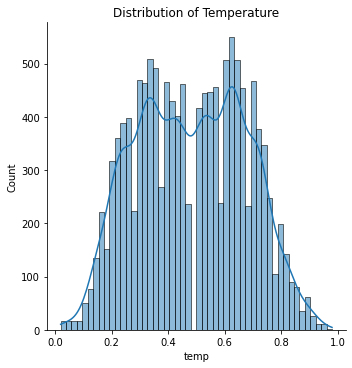

In [9]:
sns.displot(train_data['temp'], bins = 50, kde = True).set(title = "Distribution of Temperature");

Everytime the bike is shared, the temp is noted.

##### Most people won't rent a bike when it is too hot or too cold. More bikes are rented when the temperature is pleasant.
##### High number of bikes are rented when the temp is around 0.35 and 0.60

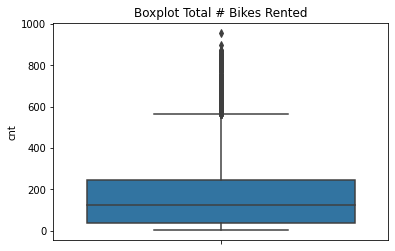

In [20]:
sns.boxplot(y= train_data['cnt']).set(title = "Boxplot Total # Bikes Rented");

##### The outliers here need to be studied further as they are important from business pov

## Categorical Variable

In [10]:
train_data['season'].unique()

array([1, 2, 3, 4])

In [11]:
train_data['season'].value_counts() 

# 1:spring, 2:summer, 3:fall, 4:winter

2    4409
1    3980
3    2512
4    2134
Name: season, dtype: int64

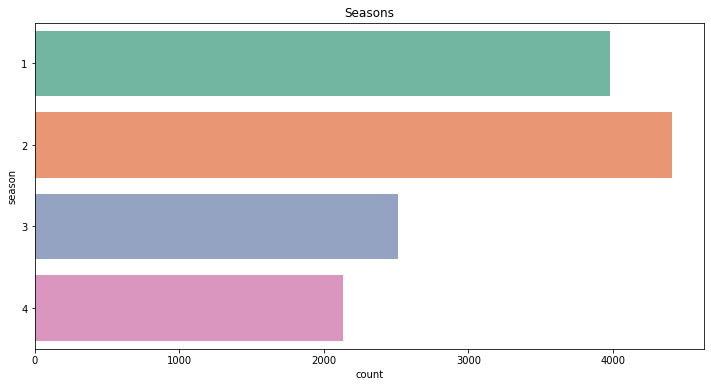

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(y = train_data.season, palette = 'Set2').set(title = "Seasons");
# y - horizontal bar

In [17]:
print (3980 + 4409) # season 1 and 2
print (2512 + 2134) # season 3 and 4

# 1:spring, 2:summer, 3:fall, 4:winter

8389
4646


#### Season 1 and 2 have twice the number of instances of Bike Sharing than season 3 and 4. This, intuitively, makes sense as season 1 & 2 are spring and summer which would be pleasant and season 3 & 4 would be fall & winter which will be cold.

# Bivariate Analysis

## Continuous & Continuous

### Scatter Plot

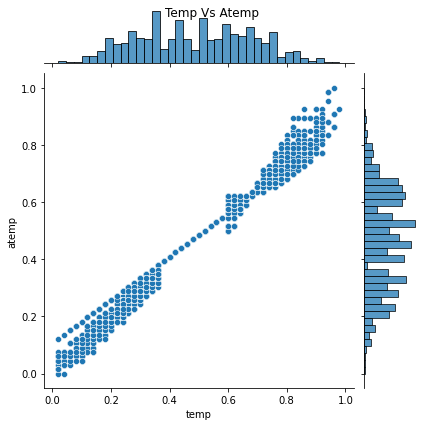

In [21]:
plot = sns.jointplot(x = train_data.temp, y = train_data.atemp, kind = 'scatter');
plot.fig.suptitle("Temp Vs Atemp");

#### Temp and atemp have a positive linear relation

### Correlation

In [23]:
train_data.temp.corr(train_data.atemp)
np.round(train_data.temp.corr(train_data.atemp),2)

0.99

## Categorical & Continuous

### Boxplots of Continuous Variable over the Categories of Categorical Variable

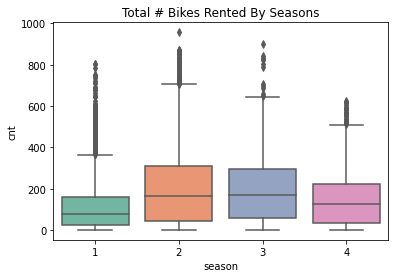

In [24]:
sns.boxplot(y = train_data.cnt, x = train_data.season, palette ='Set2').set(title = "Total # Bikes Rented By Seasons");

**The cnt column is an important column for analysis and the outliers are good for the business because we are working with Bike Sharing Data. So, we will not treat them.**

## Categorical & Categorical

### Pivot Tables And Stacked Bar Chart

In [25]:
train_data.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [26]:
# Average number of bikes rented hourly on a working and a non-workingday

tbl = train_data.pivot_table(columns = 'workingday', index = 'hr', values = 'cnt', aggfunc = 'mean')
tbl = round(tbl)
tbl

# col of table = the categories of workingday
# rows of the tables = index === hr 
# data in the table is aggfunc applied to the 'cnt' col === mean(cnt)


workingday,0,1
hr,,
0,80.0,32.0
1,60.0,15.0
2,47.0,8.0
3,23.0,5.0
4,7.0,5.0
5,8.0,21.0
6,17.0,89.0
7,38.0,252.0
8,92.0,418.0


<Figure size 864x432 with 0 Axes>

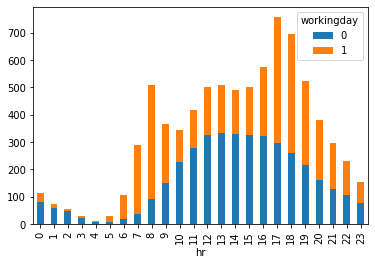

In [28]:
plt.figure(figsize=(12,6))
tbl.plot(kind = 'bar', stacked = True);

##### Shows us hourly distribution of count of rented bikes. 
- In the hours 0-6, when people will be sleeping, we have low amount of rented bikes. 
- Around 7th to 9th hour and 17th to 19th hour, we see a hike in the number of biked rented. This would be the hours when people go and come back from work on a working day.